# Application of Explainable Machine Learning on Prediction

## Dataset: Scene

*   299 Features
*   2407 Observations
*   Predict class: [0, 1]



### Loading Packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install lime

In [ ]:
pip install shap

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scipy.stats import uniform, randint
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import lime
import lime.lime_tabular
import shap

import warnings
warnings.filterwarnings('ignore')

### Data Cleaning

In [ ]:
# Load the data
scene = pd.read_csv('scene.csv')
scene.head()

,Unnamed: 0,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,...,attr291,attr292,attr293,attr294,Beach,Sunset,FallFoliage,Field,Mountain,class
0,0,0.646467,0.666435,0.685047,0.699053,0.652746,0.407864,0.150309,0.535193,0.555689,...,0.157332,0.247298,0.014025,0.029709,1,0,0,0,1,0
1,1,0.770156,0.767255,0.761053,0.745630,0.742231,0.688086,0.708416,0.757351,0.760633,...,0.251454,0.137833,0.082672,0.036320,1,0,0,0,0,1
2,2,0.793984,0.772096,0.761820,0.762213,0.740569,0.734361,0.722677,0.849128,0.839607,...,0.017166,0.051125,0.112506,0.083924,1,0,0,0,0,0
3,3,0.938563,0.949260,0.955621,0.966743,0.968649,0.869619,0.696925,0.953460,0.959631,...,0.019267,0.031290,0.049780,0.090959,1,0,0,0,0,0
4,4,0.512130,0.524684,0.520020,0.504467,0.471209,0.417654,0.364292,0.562266,0.588592,...,0.198151,0.238796,0.164270,0.184290,1,0,0,0,0,0


In [ ]:
scene.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2407 entries, 0 to 2406
Columns: 301 entries, Unnamed: 0 to class
dtypes: float64(294), int64(7)
memory usage: 5.5 MB


In [ ]:
# Drop Unnamed column
scene = scene.drop(columns = 'Unnamed: 0')

# Check missing data
scene.isnull().sum().sum()

0

There's no missing value.

In [ ]:
scene.describe()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr291,attr292,attr293,attr294,Beach,Sunset,FallFoliage,Field,Mountain,class
count,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,...,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000
mean,0.658669,0.694148,0.715307,0.721717,0.713643,0.690993,0.653925,0.652328,0.686060,0.707412,...,0.119322,0.117860,0.112393,0.110179,0.177399,0.151226,0.164936,0.179892,0.221437,0.179061
std,0.213751,0.198882,0.188399,0.185636,0.187857,0.200795,0.219823,0.198750,0.180039,0.168036,...,0.159064,0.156272,0.149826,0.149425,0.382086,0.358343,0.371200,0.384177,0.415301,0.383483
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.534945,0.578996,0.612401,0.614904,0.608947,0.583404,0.531731,0.540349,0.577471,0.607320,...,0.021149,0.020905,0.021072,0.019841,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.681079,0.718068,0.737771,0.743758,0.734662,0.716582,0.685605,0.677021,0.707229,0.723166,...,0.063346,0.063062,0.059217,0.056948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.819445,0.843483,0.857111,0.863527,0.854056,0.840869,0.817084,0.791899,0.819788,0.831932,...,0.155334,0.153047,0.138648,0.137369,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Display cleaned data
scene.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr291,attr292,attr293,attr294,Beach,Sunset,FallFoliage,Field,Mountain,class
0,0.646467,0.666435,0.685047,0.699053,0.652746,0.407864,0.150309,0.535193,0.555689,0.580782,...,0.157332,0.247298,0.014025,0.029709,1,0,0,0,1,0
1,0.770156,0.767255,0.761053,0.745630,0.742231,0.688086,0.708416,0.757351,0.760633,0.740314,...,0.251454,0.137833,0.082672,0.036320,1,0,0,0,0,1
2,0.793984,0.772096,0.761820,0.762213,0.740569,0.734361,0.722677,0.849128,0.839607,0.812746,...,0.017166,0.051125,0.112506,0.083924,1,0,0,0,0,0
3,0.938563,0.949260,0.955621,0.966743,0.968649,0.869619,0.696925,0.953460,0.959631,0.966320,...,0.019267,0.031290,0.049780,0.090959,1,0,0,0,0,0
4,0.512130,0.524684,0.520020,0.504467,0.471209,0.417654,0.364292,0.562266,0.588592,0.584449,...,0.198151,0.238796,0.164270,0.184290,1,0,0,0,0,0


### Data Visualization

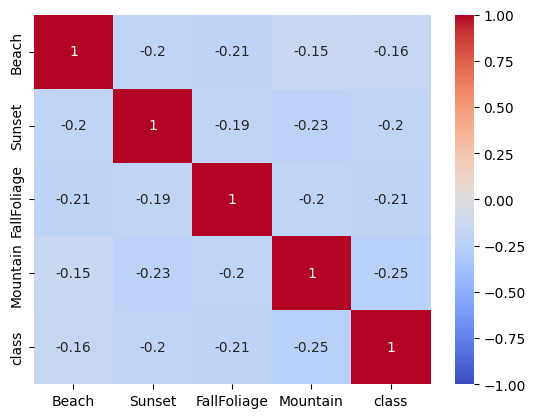

In [ ]:
corr_features = ['Beach', 'Sunset', 'FallFoliage', 'Mountain', 'class']
corr = scene[corr_features].corr()
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()

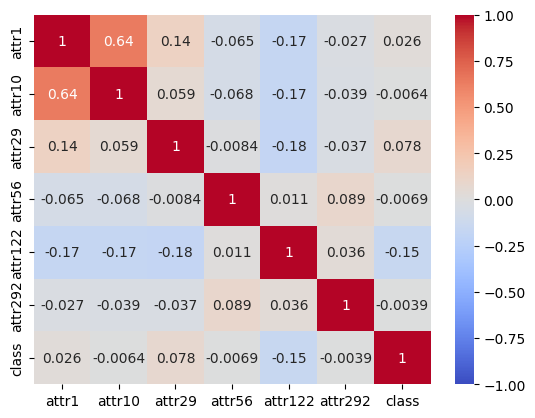

In [ ]:
# Select some attribute to see correlations
corr_attrs = ['attr1', 'attr10', 'attr29', 'attr56', 'attr122', 'attr292', 'class']
corr = scene[corr_attrs].corr()
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()

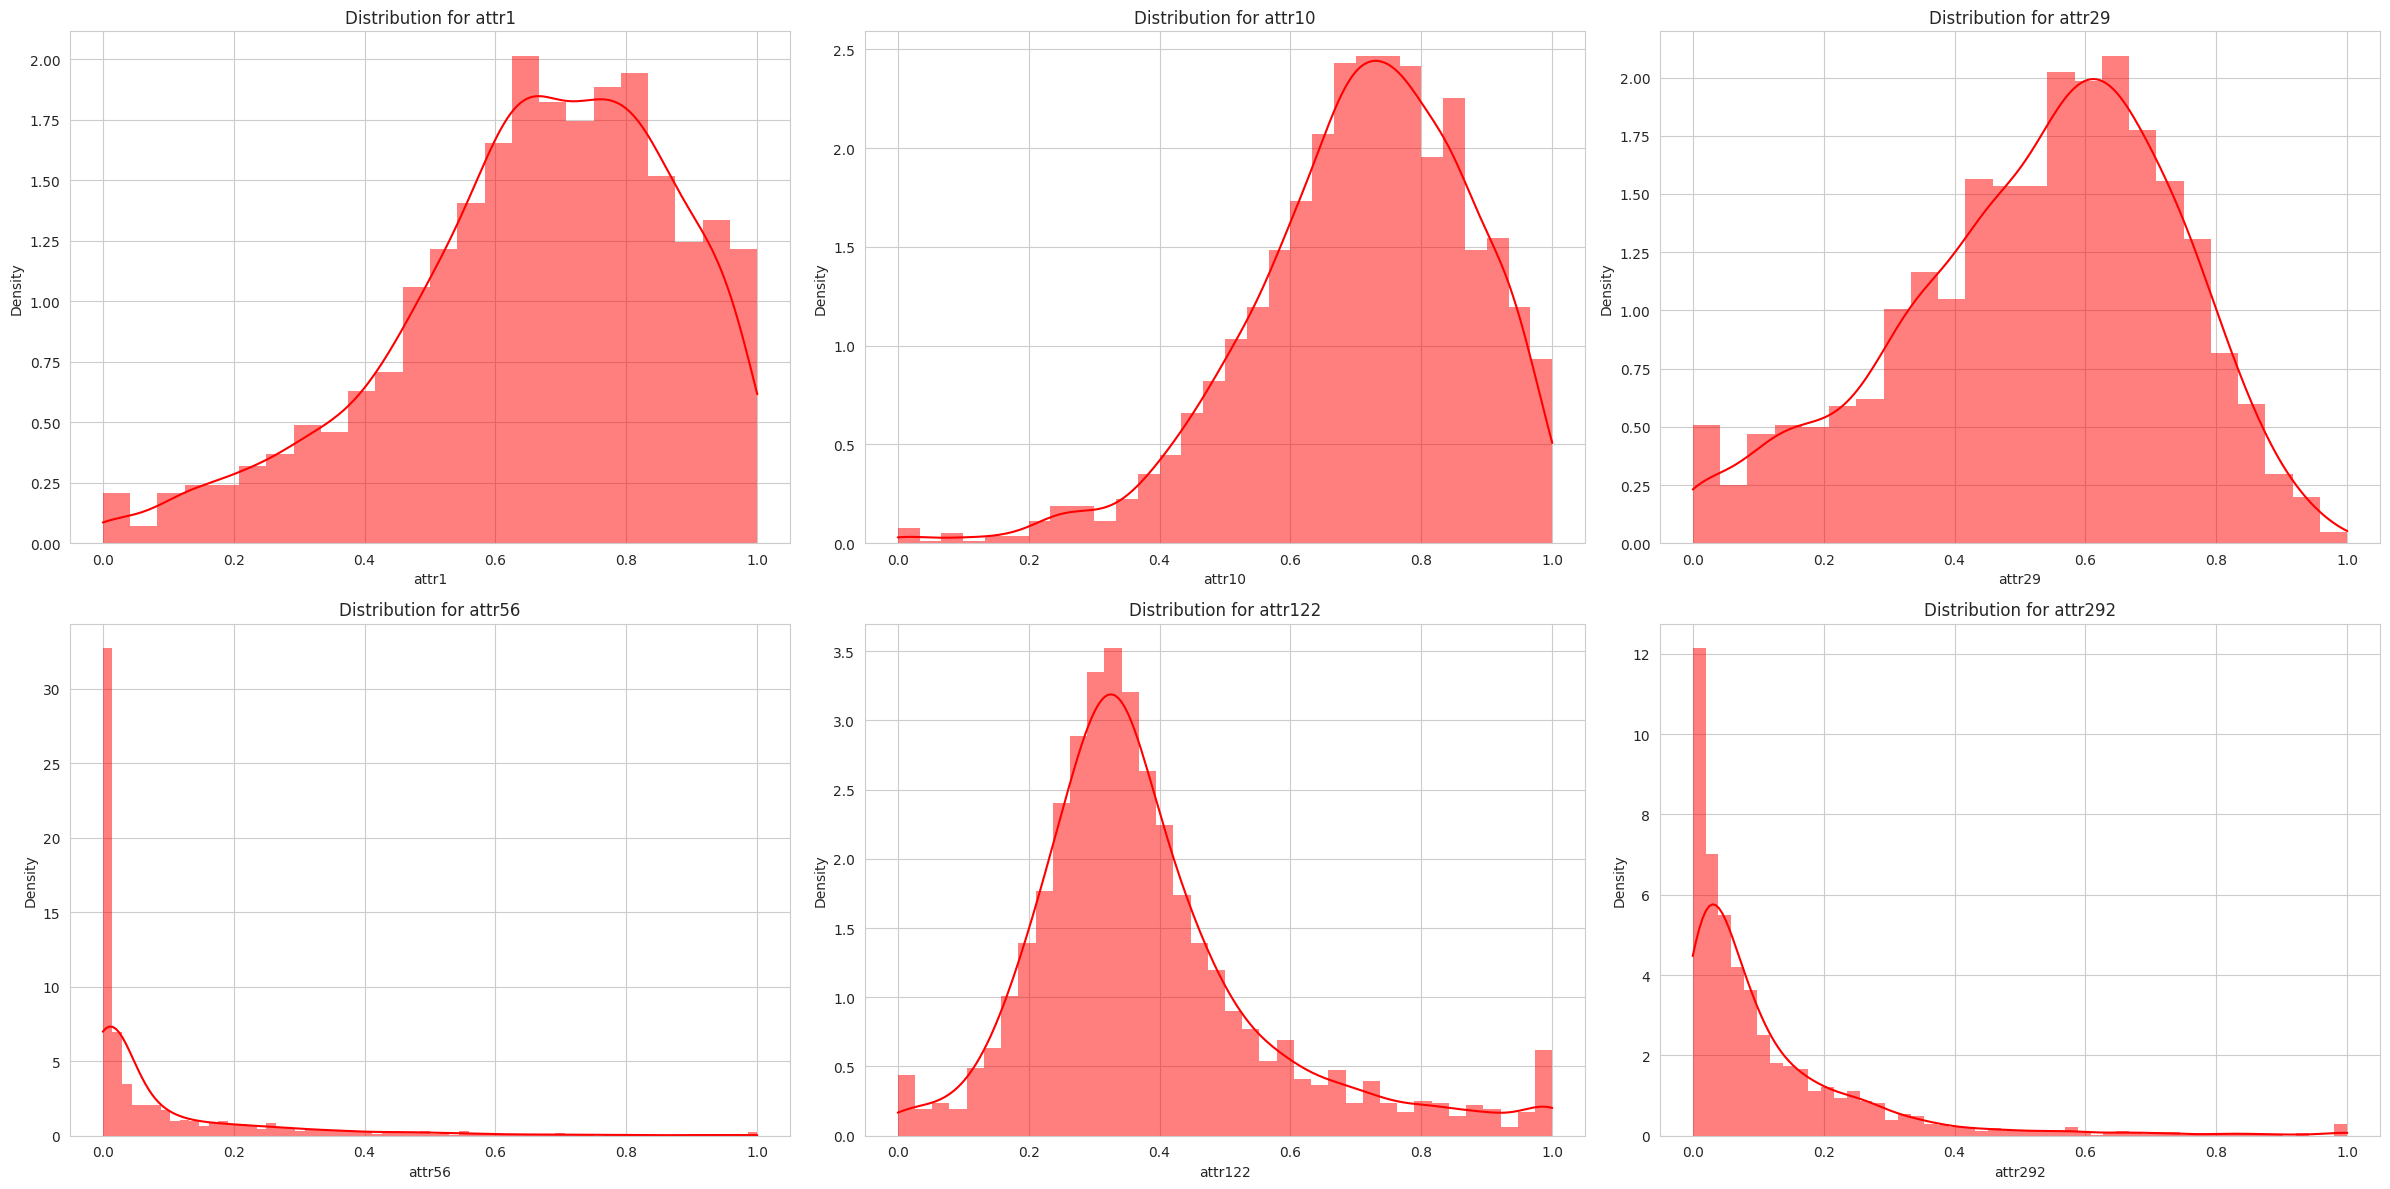

In [ ]:
attrs = ['attr1', 'attr10', 'attr29', 'attr56', 'attr122', 'attr292']

sns.set_style('whitegrid')

# Plot layout
n_rows = 2
n_cols = 3
plt.figure(figsize=(24, 12))

# Loop through the features and create a histogram for each
for i, attr in enumerate(attrs):
  plt.subplot(n_rows, n_cols, i + 1)
  sns.histplot(scene[attr], kde=True, color='red', stat="density", linewidth=0)
  plt.title(f'Distribution for {attr}')
  plt.xlabel(attr)
  plt.ylabel('Density')

# Display the plots
plt.tight_layout()
plt.show()

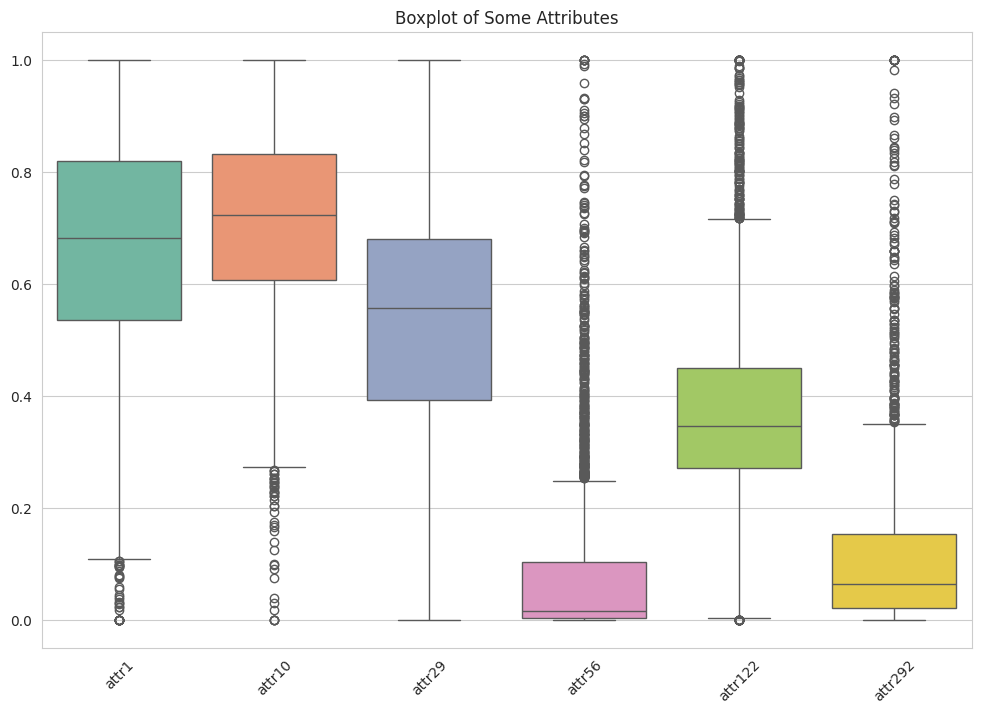

In [ ]:
# Plotting boxplot for some Attributes
plt.figure(figsize=(12, 8))
sns.boxplot(data=scene[attrs], palette="Set2")
plt.title('Boxplot of Some Attributes')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

Attributes are distributed in the same range (0, 1), and other features are binary, so we don't need further standardization, but transformation is needed for skewed attributes.

### Data Preprocessing

In [ ]:
# Calculate skewness of each attribute
skewness = scene[scene.columns[0:294]].skew()

# Identify right-skewed and left-skewed attributes based on skewness values
right_skewed = skewness[skewness > 1].index
left_skewed = skewness[skewness < -1].index

# Display
right_skewed, left_skewed

(Index(['attr50', 'attr51', 'attr52', 'attr53', 'attr54', 'attr55', 'attr56',
        'attr57', 'attr58', 'attr59',
        ...
        'attr285', 'attr286', 'attr287', 'attr288', 'attr289', 'attr290',
        'attr291', 'attr292', 'attr293', 'attr294'],
       dtype='object', length=188),
 Index([], dtype='object'))

There's no left skewed attributes, so we will only apply transformation to right skewed attributes.

In [ ]:
# Apply Log Transformation
scene_trans = scene.copy() # make a copy, keep original df unchanged

# Adding a small constant to negative attributes to make all values positive
non_positive_values = (scene[right_skewed] <= 0).any()
columns_with_non_positive = non_positive_values.index[non_positive_values]
scene_trans[columns_with_non_positive] += 0.001

# Apply logarithmic transformation to the right-skewed attributes
scene_trans[right_skewed] = np.log(scene_trans[right_skewed])

In [ ]:
# Identify features and labels
X = scene_trans.drop('class', axis=1)
y = scene_trans['class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building & Evaluation

#### Logistic Regression

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(random_state = 42)
lr_model.fit(X_train, y_train)

# Prediction
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Evaluation
lr_report = classification_report(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
log_loss_lr = log_loss(y_test, y_pred_proba_lr)

# Results
print('Logistics Regression Evaluation\n')
print(lr_report)
print(f'Accuracy: {accuracy_lr}\nLog Loss: {log_loss_lr}')

Logistics Regression Evaluation

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       413
           1       0.95      0.86      0.90        69

    accuracy                           0.97       482
   macro avg       0.96      0.92      0.94       482
weighted avg       0.97      0.97      0.97       482

Accuracy: 0.9730290456431535
Log Loss: 0.08674188912480327


#### K-Nearest Neighbors

In [ ]:
# KNN
knn = KNeighborsClassifier()

# Find best n_neighbors by cross-validation
k_grid = {'n_neighbors': range(1, 30),
          'weights': ['uniform', 'distance'],
          'metric': ['euclidean', 'manhattan']
          }
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn_cv = GridSearchCV(knn, k_grid, cv=kf)

# Train model
knn_cv.fit(X_train, y_train)
knn_model = knn_cv.best_estimator_ # best KNN model

# Prediction
y_pred_knn = knn_model.predict(X_test)
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]

# Evaluation
knn_report = classification_report(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
log_loss_knn = log_loss(y_test, y_pred_proba_knn)

# Results
print('K-Nearest Neighbors Evaluation\n')
print(knn_report)
print(f'Accuracy: {accuracy_knn}\nLog Loss: {log_loss_knn}')

K-Nearest Neighbors Evaluation

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       413
           1       0.73      0.55      0.63        69

    accuracy                           0.91       482
   macro avg       0.83      0.76      0.79       482
weighted avg       0.90      0.91      0.90       482

Accuracy: 0.9066390041493776
Log Loss: 0.2558128735315412


#### Support Vector Machine

In [ ]:
# Support Vector Machine
svm_model = SVC(probability = True, random_state = 42)
svm_model.fit(X_train, y_train)

# Prediction
y_pred_svm = svm_model.predict(X_test)
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Evaluation
svm_report = classification_report(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
log_loss_svm = log_loss(y_test, y_pred_proba_svm)

# Results
print('Support Vector Machine Evaluation\n')
print(svm_report)
print(f'Accuracy: {accuracy_svm}\nLog Loss: {log_loss_svm}')

Support Vector Machine Evaluation

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       413
           1       0.96      0.39      0.56        69

    accuracy                           0.91       482
   macro avg       0.94      0.69      0.75       482
weighted avg       0.92      0.91      0.89       482

Accuracy: 0.9107883817427386
Log Loss: 0.2228758607576252


#### Decision Tree

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Prediction
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluation
dt_report = classification_report(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
log_loss_dt = log_loss(y_test, y_pred_proba_dt)

# Results
print('Decision Tree Evaluation\n')
print(dt_report)
print(f'Accuracy: {accuracy_dt}\nLog Loss: {log_loss_dt}')

Decision Tree Evaluation

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       413
           1       0.46      0.77      0.58        69

    accuracy                           0.84       482
   macro avg       0.71      0.81      0.74       482
weighted avg       0.89      0.84      0.85       482

Accuracy: 0.8381742738589212
Log Loss: 0.29787523293240814


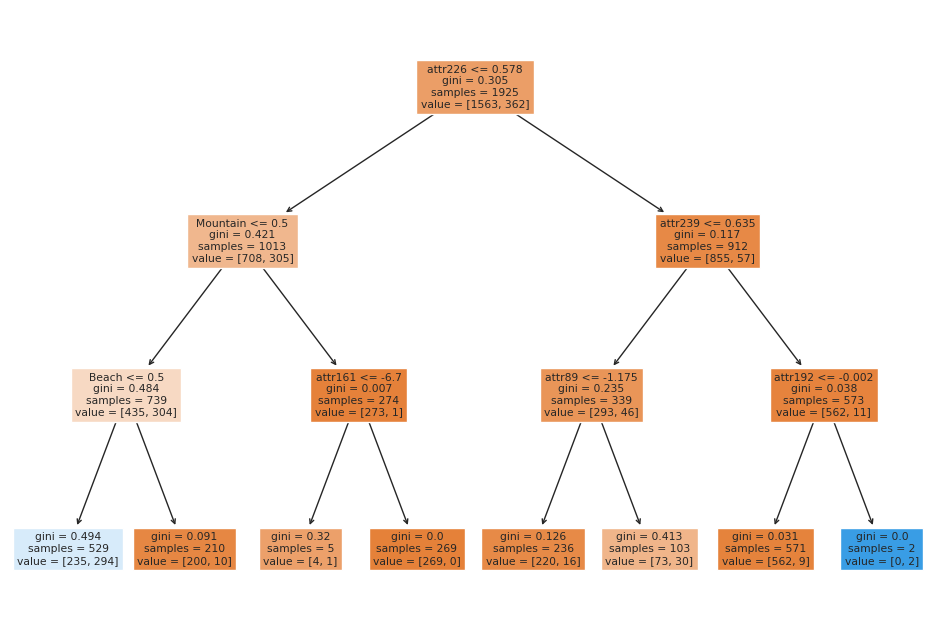

In [ ]:
# Visualize Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names = X.columns.tolist())
plt.show()

#### Random Forest

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train)

# Prediction
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
rf_report = classification_report(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
log_loss_rf = log_loss(y_test, y_pred_proba_rf)

# Results
print('Random Forest Evaluation\n')
print(rf_report)
print(f'Accuracy: {accuracy_rf}\nLog Loss: {log_loss_rf}')

Random Forest Evaluation

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       413
           1       1.00      0.55      0.71        69

    accuracy                           0.94       482
   macro avg       0.97      0.78      0.84       482
weighted avg       0.94      0.94      0.93       482

Accuracy: 0.9356846473029046
Log Loss: 0.21582917929895007


#### AdaBoost

In [ ]:
# AdaBoost
ab_model = AdaBoostClassifier(random_state = 42)
ab_model.fit(X_train, y_train)

# Prediction
y_pred_ab = ab_model.predict(X_test)
y_pred_proba_ab = ab_model.predict_proba(X_test)[:, 1]

# Evaluation
ab_report = classification_report(y_test, y_pred_ab)
accuracy_ab = accuracy_score(y_test, y_pred_ab)
log_loss_ab = log_loss(y_test, y_pred_proba_ab)

# Results
print('AdaBoost Evaluation\n')
print(ab_report)
print(f'Accuracy: {accuracy_ab}\nLog Loss: {log_loss_ab}')

AdaBoost Evaluation

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       413
           1       1.00      0.94      0.97        69

    accuracy                           0.99       482
   macro avg       1.00      0.97      0.98       482
weighted avg       0.99      0.99      0.99       482

Accuracy: 0.991701244813278
Log Loss: 0.5328500083795626


#### XGBoost

In [ ]:
# XGBoost
xgb_grid = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.29),
    'max_depth': randint(3, 10),
    'colsample_bytree': uniform(0.5, 1),
    'min_child_weight': randint(1, 5),
    'subsample': uniform(0.5, 0.5),
    'gamma': uniform(0, 0.4),
    'reg_alpha': uniform(0, 40),
    'reg_lambda': uniform(0, 1)
}

xgb_cv = RandomizedSearchCV(
    XGBClassifier(objective='binary:logistic'), # binary classification
    param_distributions = xgb_grid,
    n_iter = 100,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5,
    verbose = 3,
    random_state = 42
)

# Train model
xgb_cv.fit(X_train, y_train)
xgb_model = xgb_cv.best_estimator_ # best XGBoost model

# Prediction
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
xgb_report = classification_report(y_test, y_pred_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
log_loss_xgb = log_loss(y_test, y_pred_proba_xgb)

# Results
print('XGBoost Evaluation\n')
print(xgb_report)
print(f'Accuracy: {accuracy_xgb}\nLog Loss: {log_loss_xgb}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
XGBoost Evaluation

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       413
           1       1.00      0.88      0.94        69

    accuracy                           0.98       482
   macro avg       0.99      0.94      0.96       482
weighted avg       0.98      0.98      0.98       482

Accuracy: 0.983402489626556
Log Loss: 0.05974367656473351


#### Neural Network

In [ ]:
# Neural Network
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Build model
neural_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]), # add layers
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
neural_model.compile(loss='binary_crossentropy', # for binary classification
              optimizer='adam',
              metrics=['accuracy'])

# Train model
history_neural = neural_model.fit(X_train, y_train, epochs = 25,
                                  batch_size = 32, verbose = 1, validation_split = 0.2)

Epoch 1/25
49/49 [==============================] - 2s 10ms/step - loss: 0.4533 - accuracy: 0.8175 - val_loss: 0.4130 - val_accuracy: 0.8052
Epoch 2/25
49/49 [==============================] - 0s 5ms/step - loss: 0.3369 - accuracy: 0.8429 - val_loss: 0.3696 - val_accuracy: 0.8416
Epoch 3/25
49/49 [==============================] - 0s 5ms/step - loss: 0.2970 - accuracy: 0.8636 - val_loss: 0.3514 - val_accuracy: 0.8468
Epoch 4/25
49/49 [==============================] - 0s 5ms/step - loss: 0.2820 - accuracy: 0.8721 - val_loss: 0.3818 - val_accuracy: 0.8234
Epoch 5/25
49/49 [==============================] - 0s 5ms/step - loss: 0.2453 - accuracy: 0.8922 - val_loss: 0.4533 - val_accuracy: 0.8156
Epoch 6/25
49/49 [==============================] - 0s 4ms/step - loss: 0.2483 - accuracy: 0.8981 - val_loss: 0.3107 - val_accuracy: 0.8597
Epoch 7/25
49/49 [==============================] - 0s 4ms/step - loss: 0.2177 - accuracy: 0.9110 - val_loss: 0.2814 - val_accuracy: 0.8753
Epoch 8/25
49/49 [=

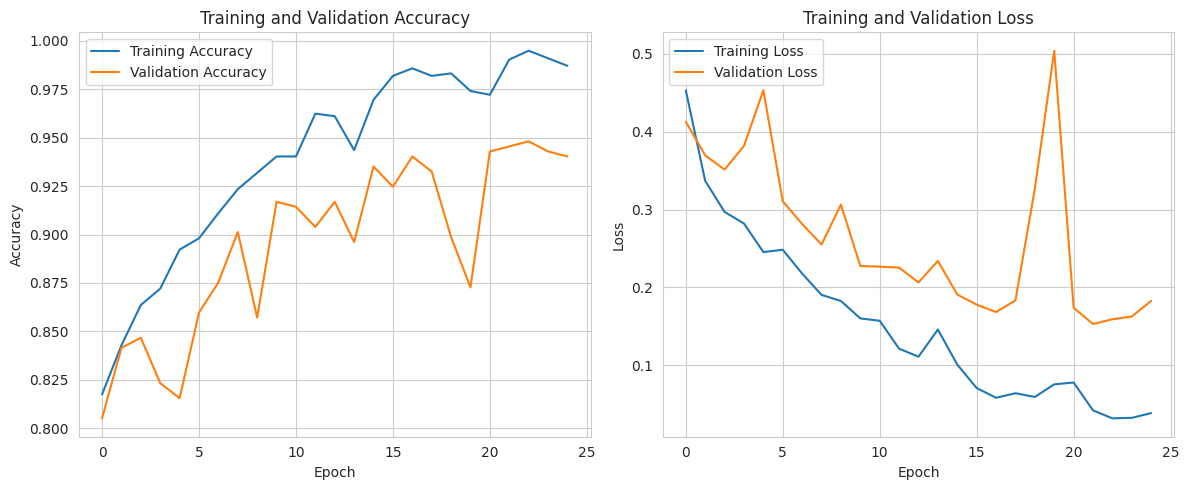

In [ ]:
# Traning Accuracy and Loss Visualization
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history_neural.history['accuracy'], label='Training Accuracy')
plt.plot(history_neural.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_neural.history['loss'], label='Training Loss')
plt.plot(history_neural.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Prediction
y_pred_proba_neural = neural_model.predict(X_test).flatten()
y_pred_neural = (y_pred_proba_neural > 0.5).astype(int)

# Evaluation
neural_report = classification_report(y_test, y_pred_neural)
log_loss_neural = log_loss(y_test, y_pred_proba_neural)
accuracy_neural = accuracy_score(y_test, y_pred_neural)

# Results
print('Neural Network Evaluation\n')
print(neural_report)
print(f'Accuracy: {accuracy_neural}\nLog Loss: {log_loss_neural}')

16/16 [==============================] - 0s 2ms/step
Neural Network Evaluation

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       413
           1       0.94      0.84      0.89        69

    accuracy                           0.97       482
   macro avg       0.95      0.92      0.93       482
weighted avg       0.97      0.97      0.97       482

Accuracy: 0.9688796680497925
Log Loss: 0.11936101625617128


### Model Selection

#### ROC Curve

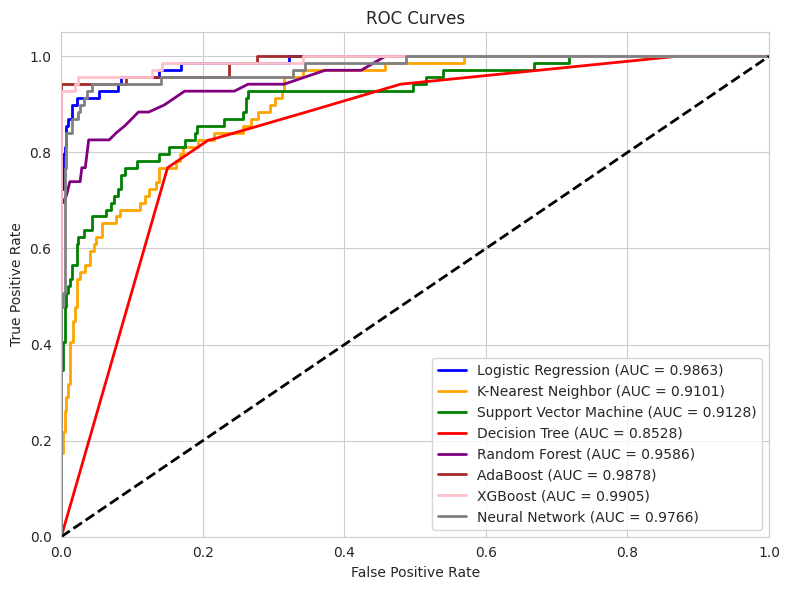

In [ ]:
# Setup plot
fig, ax = plt.subplots(figsize=(8, 6))
colors = cycle(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray'])
model_predictions = [
    (y_pred_proba_lr, 'Logistic Regression'),
    (y_pred_proba_knn, 'K-Nearest Neighbor'),
    (y_pred_proba_svm, 'Support Vector Machine'),
    (y_pred_proba_dt, 'Decision Tree'),
    (y_pred_proba_rf, 'Random Forest'),
    (y_pred_proba_ab, 'AdaBoost'),
    (y_pred_proba_xgb, 'XGBoost'),
    (y_pred_proba_neural, 'Neural Network')
]

# Plot ROC curve for each model
for model_proba, title in model_predictions:
    fpr, tpr, _ = roc_curve(y_test, model_proba)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, color=next(colors), lw=2, label=f'{title} (AUC = {roc_auc:.4f})')

ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves')
ax.legend(loc="lower right")

# Display the plot
plt.tight_layout()
plt.show()

#### Performance Metrics

In [ ]:
# Model names
model = ['Logistic Regression', 'K-Nearest Neighbor', 'Support Vector Machine',
         'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost', 'Neural Network']

# Performance metrics
performance = {
    'Accuracy': [accuracy_lr, accuracy_knn, accuracy_svm, accuracy_dt,
                 accuracy_rf, accuracy_ab, accuracy_xgb, accuracy_neural],
    'Log Loss': [log_loss_lr, log_loss_knn, log_loss_svm, log_loss_dt,
                 log_loss_rf, log_loss_ab, log_loss_xgb, log_loss_neural],
    'ROC AUC': [
        roc_auc_score(y_test, y_pred_proba_lr),
        roc_auc_score(y_test, y_pred_proba_knn),
        roc_auc_score(y_test, y_pred_proba_svm),
        roc_auc_score(y_test, y_pred_proba_dt),
        roc_auc_score(y_test, y_pred_proba_rf),
        roc_auc_score(y_test, y_pred_proba_ab),
        roc_auc_score(y_test, y_pred_proba_xgb),
        roc_auc_score(y_test, y_pred_proba_neural)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_ab),
        precision_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_neural)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_ab),
        recall_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_neural)
    ],
    'F1 Score (macro)': [
        f1_score(y_test, y_pred_lr, average='macro'),
        f1_score(y_test, y_pred_knn, average='macro'),
        f1_score(y_test, y_pred_svm, average='macro'),
        f1_score(y_test, y_pred_dt, average='macro'),
        f1_score(y_test, y_pred_rf, average='macro'),
        f1_score(y_test, y_pred_ab, average='macro'),
        f1_score(y_test, y_pred_xgb, average='macro'),
        f1_score(y_test, y_pred_neural, average='macro')
    ],
    'F1 Score (micro)': [
        f1_score(y_test, y_pred_lr, average='micro'),
        f1_score(y_test, y_pred_knn, average='micro'),
        f1_score(y_test, y_pred_svm, average='micro'),
        f1_score(y_test, y_pred_dt, average='micro'),
        f1_score(y_test, y_pred_rf, average='micro'),
        f1_score(y_test, y_pred_ab, average='micro'),
        f1_score(y_test, y_pred_xgb, average='micro'),
        f1_score(y_test, y_pred_neural, average='micro')
    ],
    'F1 Score (weighted)': [
        f1_score(y_test, y_pred_lr, average='weighted'),
        f1_score(y_test, y_pred_knn, average='weighted'),
        f1_score(y_test, y_pred_svm, average='weighted'),
        f1_score(y_test, y_pred_dt, average='weighted'),
        f1_score(y_test, y_pred_rf, average='weighted'),
        f1_score(y_test, y_pred_ab, average='weighted'),
        f1_score(y_test, y_pred_xgb, average='weighted'),
        f1_score(y_test, y_pred_neural, average='weighted')
    ]
}

performance_df = pd.DataFrame(performance, index=model).sort_values(by=['Accuracy'], ascending=False)
print(performance_df)

                        Accuracy  Log Loss   ROC AUC  Precision    Recall  \
AdaBoost                0.991701  0.532850  0.987788   1.000000  0.942029   
XGBoost                 0.983402  0.059744  0.990490   1.000000  0.884058   
Logistic Regression     0.973029  0.086742  0.986279   0.951613  0.855072   
Neural Network          0.968880  0.119361  0.976559   0.935484  0.840580   
Random Forest           0.935685  0.215829  0.958592   1.000000  0.550725   
Support Vector Machine  0.910788  0.222876  0.912798   0.964286  0.391304   
K-Nearest Neighbor      0.906639  0.255813  0.910096   0.730769  0.550725   
Decision Tree           0.838174  0.297875  0.852792   0.460870  0.768116   

                        F1 Score (macro)  F1 Score (micro)  \
AdaBoost                        0.982665          0.991701   
XGBoost                         0.964435          0.983402   
Logistic Regression             0.942579          0.973029   
Neural Network                  0.933744          0.968880

**AdaBoost** is the best model based on the performance metrics.

### Feature Evaluation

#### LIME

In [ ]:
# Create a LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data = X_train.values,
    feature_names = X_train.columns.tolist(),
    mode = 'classification'
)

# LIME Explaination (too many features so only show one example)
explanation = lime_explainer.explain_instance(X_test.values[22], ab_model.predict_proba, num_features=len(X_train.columns))
explanation.show_in_notebook(show_table=True, show_all=False)

In [ ]:
n = X_test.shape[0] # sample size
feature_score_lime = {feature: 0 for feature in X_train.columns}

for i in range(n):
  explanation = lime_explainer.explain_instance(X_test.values[i], ab_model.predict_proba, num_features=len(X_train.columns))
  exp_list = explanation.as_list()

  for tup in exp_list:
    feature, score = tup[0], tup[1]

    # Get total influential score for each feature
    for key, value in feature_score_lime.items():
      if key in feature:
        feature_score_lime[key] += abs(score)

# Get average influential value
for key, value in feature_score_lime.items():
  feature_score_lime[key] /= n

# Sort the dictionary by values
sorted_feature_lime = sorted(feature_score_lime.items(), key=lambda x: x[1])

# Create a DataFrame to display the result
df_feature_lime = pd.DataFrame(sorted_feature_lime, columns=['Feature', 'Score'])
df_feature_lime.head(10)

,Feature,Score
0,attr139,0.000422
1,attr220,0.000428
2,attr261,0.000431
3,attr165,0.000433
4,attr116,0.000434
5,attr137,0.000435
6,attr272,0.000436
7,attr105,0.000436
8,attr289,0.000436
9,attr130,0.000438


#### SHAP

In [ ]:
# Initialize Explainer
shap_explainer = shap.KernelExplainer(ab_model.predict_proba, shap.sample(X_train, 10))

# Compute SHAP values for the test set
shap_values = shap_explainer.shap_values(X_test)

# Random select instances for explanation example
indices = np.random.choice(X_test.shape[0], size=3, replace=False)

for i in indices:
    shap.initjs()
    print(f"Index: {i}")

    for class_index in range(shap_values.shape[2]):  # Loop through each class
        explainer_value = shap_explainer.expected_value[class_index]
        shap_values_class = shap_values[i, :, class_index]

        # Display the SHAP force plot for each class for the selected instance
        print(f"Class Index: {class_index}")
        plot = shap.force_plot(explainer_value, shap_values_class, X_test.iloc[i, :], link="logit", show = False)
        display(plot)

  0%|          | 0/482 [00:00<?, ?it/s]

Index: 108
Class Index: 0


Class Index: 1


Index: 82
Class Index: 0


Class Index: 1


Index: 363
Class Index: 0


Class Index: 1


**General Interpretation**\
f(x): The base value, which indicates the average model output (probability) over the training set for certain class.\
Red arrows: Indicate feature values that push the prediction higher than the base value for a given class.\
Blue arrows: Indicate feature values that pull the prediction lower than the base value for that class.\
Length of arrows: Represents the magnitude of the feature's contribution to the prediction.\
Position of the feature label: Indicates the actual value of that feature for the instance being explained.\
The output value for the prediction is the final position on the x-axis after all the feature contributions have been taken into account. If it is greater than the base value, the model predicts that this instance is more likely to be in that class; if it is less, it predicts it is less likely to be in the class.

In [ ]:
# Convert the list of SHAP values for each class into an array
shap_values_array = np.stack(shap_values, axis=1)

# Compute the mean of the absolute SHAP values across the selected instances for each feature
mean_abs_shap_values = np.abs(shap_values_array).mean(axis=0)
if mean_abs_shap_values.ndim > 1:
    mean_abs_shap_values = mean_abs_shap_values.mean(axis=1)

# Create a dictionary for feature scores
feature_score_shap = {feature: mean_abs_shap_values[idx] for idx, feature in enumerate(X_train.columns)}
sorted_feature_shap = sorted(feature_score_shap.items(), key=lambda x: x[1])

# Create a DataFrame to display the result
df_feature_shap = pd.DataFrame(sorted_feature_shap, columns=['Feature', 'Score'])
df_feature_shap.head(10)

,Feature,Score
0,attr93,0.000506
1,attr29,0.000516
2,attr218,0.000525
3,attr142,0.000526
4,attr71,0.000530
5,attr73,0.000533
6,attr118,0.000541
7,attr258,0.000541
8,attr21,0.000542
9,attr244,0.000543


### Model Optimization

#### After LIME

In [ ]:
# Drop non-influential features
drop_features_lime = ['attr139', 'attr220', 'attr261', 'attr165', 'attr116',
                      'attr137', 'attr272', 'attr105', 'attr289', 'attr130']

# or we could set a threshold(but scores are too small here, so we arbitrary select attr)
# drop_features_lime = df_feature_lime[df_feature_lime['Score'] < 0.000543]['Feature']

X_train_lime = X_train.drop(columns = drop_features_lime)
X_test_lime = X_test.drop(columns = drop_features_lime)

# Fit the model on the reduced feature set
lime_model = AdaBoostClassifier(random_state = 42)
lime_model.fit(X_train_lime, y_train)

# Prediction
y_pred_lime = lime_model.predict(X_test_lime)
y_pred_proba_lime = lime_model.predict_proba(X_test_lime)[:, 1]

# Evaluation
lime_report = classification_report(y_test, y_pred_lime)
accuracy_lime = accuracy_score(y_test, y_pred_lime)
log_loss_lime = log_loss(y_test, y_pred_proba_lime)

# Results
print('AdaBoost Evaluation (LIME)\n')
print(lime_report)
print(f'Accuracy: {accuracy_lime}\nLog Loss: {log_loss_lime}')

AdaBoost Evaluation (LIME)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       413
           1       1.00      0.94      0.97        69

    accuracy                           0.99       482
   macro avg       1.00      0.97      0.98       482
weighted avg       0.99      0.99      0.99       482

Accuracy: 0.991701244813278
Log Loss: 0.5328500083795626


#### After SHAP

In [ ]:
# Drop non-influential features from the training and test sets
drop_features_shap = ['attr93', 'attr29', 'attr218', 'attr142', 'attr71',
                      'attr73', 'attr118', 'attr258', 'attr21', 'attr244']
X_train_shap = X_train.drop(columns=drop_features_shap)
X_test_shap = X_test.drop(columns=drop_features_shap)

# Fit the model on the reduced feature set
shap_model = AdaBoostClassifier(random_state = 42)
shap_model.fit(X_train_shap, y_train)

# Prediction
y_pred_shap = shap_model.predict(X_test_shap)
y_pred_proba_shap = shap_model.predict_proba(X_test_shap)[:, 1]

# Evaluation
shap_report = classification_report(y_test, y_pred_shap)
accuracy_shap = accuracy_score(y_test, y_pred_shap)
log_loss_shap = log_loss(y_test, y_pred_proba_shap)

# Print results
print('AdaBoost Evaluation (SHAP-Informed Model)\n')
print(shap_report)
print(f'Accuracy: {accuracy_shap}\nLog Loss: {log_loss_shap}')

AdaBoost Evaluation (SHAP-Informed Model)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       413
           1       0.98      0.94      0.96        69

    accuracy                           0.99       482
   macro avg       0.99      0.97      0.98       482
weighted avg       0.99      0.99      0.99       482

Accuracy: 0.9896265560165975
Log Loss: 0.5260232320108877


### Comparison

#### ROC Curve

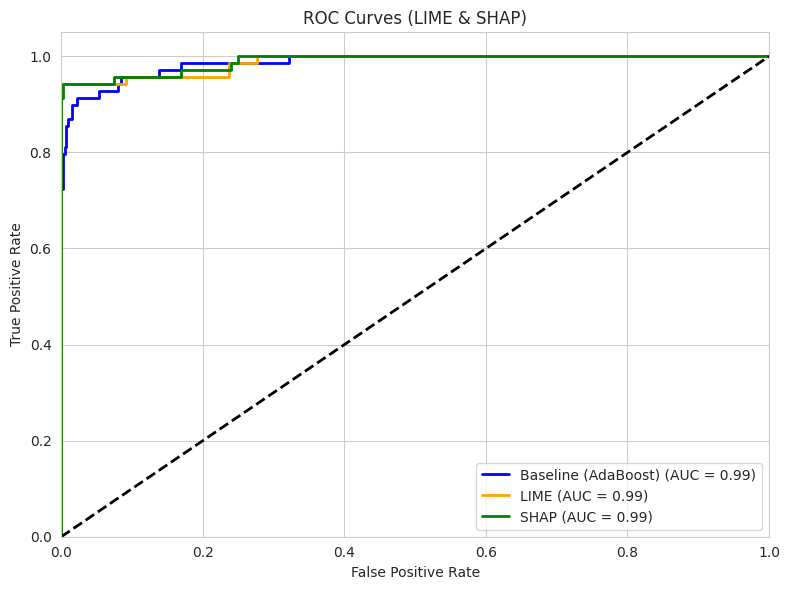

In [ ]:
# Setup plot
fig, ax = plt.subplots(figsize=(8, 6))
colors = cycle(['blue', 'orange', 'green'])
eml_predictions = [
    (y_pred_proba_lr, 'Baseline (AdaBoost)'),
    (y_pred_proba_lime, 'LIME'),
    (y_pred_proba_shap, 'SHAP')
]

# Plot ROC curve for each model
for model_proba, title in eml_predictions:
    fpr, tpr, _ = roc_curve(y_test, model_proba)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, color=next(colors), lw=2, label=f'{title} (AUC = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves (LIME & SHAP)')
ax.legend(loc="lower right")

# Display the plot
plt.tight_layout()
plt.show()

#### Performance Metrics

In [ ]:
# Index
eml_index = ['Baseline (AdaBoost)', 'LIME', 'SHAP']

# Performance metrics
performance_eml = {
    'Accuracy': [accuracy_ab, accuracy_lime, accuracy_shap],
    'Log Loss': [log_loss_ab, log_loss_lime, log_loss_shap],
    'ROC AUC': [
        roc_auc_score(y_test, y_pred_proba_ab),
        roc_auc_score(y_test, y_pred_proba_lime),
        roc_auc_score(y_test, y_pred_proba_shap)
    ],
    'Precision': [
        precision_score(y_test, y_pred_ab),
        precision_score(y_test, y_pred_lime),
        precision_score(y_test, y_pred_shap)
    ],
    'Recall': [
        recall_score(y_test, y_pred_ab),
        recall_score(y_test, y_pred_lime),
        recall_score(y_test, y_pred_shap)
    ],
    'F1 Score (macro)': [
        f1_score(y_test, y_pred_ab, average='macro'),
        f1_score(y_test, y_pred_lime, average='macro'),
        f1_score(y_test, y_pred_shap, average='macro')
    ],
    'F1 Score (micro)': [
        f1_score(y_test, y_pred_ab, average='micro'),
        f1_score(y_test, y_pred_lime, average='micro'),
        f1_score(y_test, y_pred_shap, average='micro')
    ],
    'F1 Score (weighted)': [
        f1_score(y_test, y_pred_ab, average='weighted'),
        f1_score(y_test, y_pred_lime, average='weighted'),
        f1_score(y_test, y_pred_shap, average='weighted')
    ]
}

eml_compare = pd.DataFrame(performance_eml, index=eml_index).sort_values(by=['Accuracy'], ascending=False)
print(eml_compare)

                     Accuracy  Log Loss   ROC AUC  Precision    Recall  \
Baseline (AdaBoost)  0.991701  0.532850  0.987788   1.000000  0.942029   
LIME                 0.991701  0.532850  0.987788   1.000000  0.942029   
SHAP                 0.989627  0.526023  0.989297   0.984848  0.942029   

                     F1 Score (macro)  F1 Score (micro)  F1 Score (weighted)  
Baseline (AdaBoost)          0.982665          0.991701             0.991597  
LIME                         0.982665          0.991701             0.991597  
SHAP                         0.978466          0.989627             0.989530  


### Summary Plot

  0%|          | 0/482 [00:00<?, ?it/s]

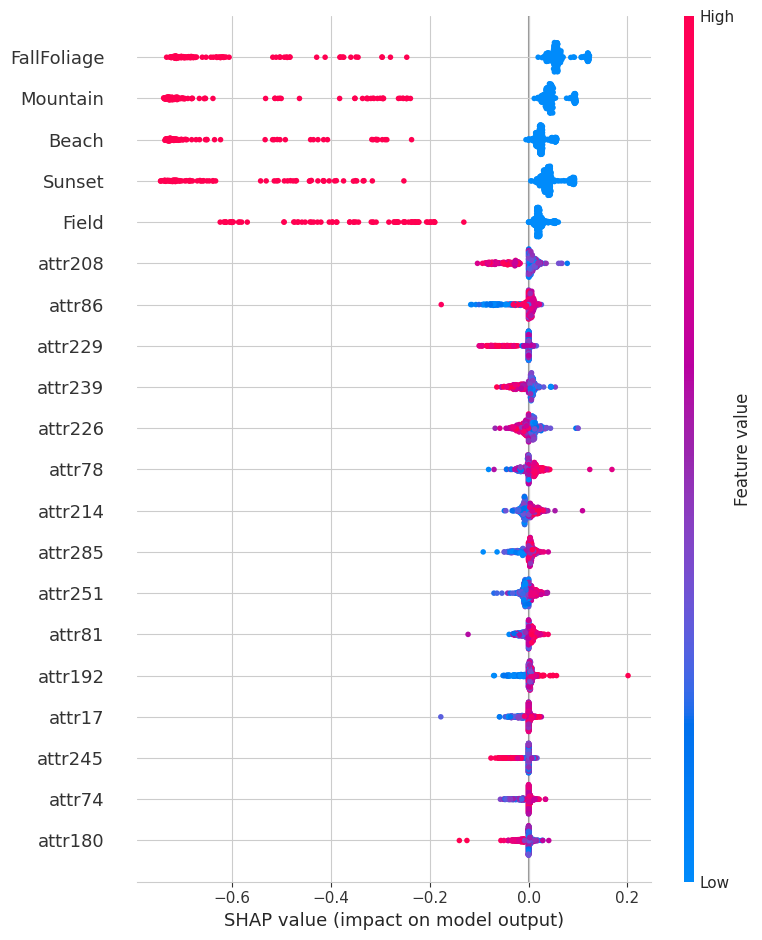

In [ ]:
class SHAPModelEvaluator:
    def __init__(self, model, X_train_df, X_test_df, y_train, drop_features):
        self.model = model
        self.X_train_df = X_train_df
        self.X_test_df = X_test_df
        self.y_train = y_train
        self.drop_features = drop_features

    def generate_summary_plot(self):
        # Reduce the feature set based on SHAP feature importance
        X_train_shap = self.X_train_df.drop(columns=self.drop_features)
        X_test_shap = self.X_test_df.drop(columns=self.drop_features)

        # Fit the model on the reduced feature set
        X_train_shap_sampled = shap.kmeans(X_train_shap, 100) # sample the training data
        self.model.fit(X_train_shap, self.y_train)

        # Create a SHAP explainer
        explainer = shap.KernelExplainer(self.model.predict, X_train_shap_sampled, link="identity")

        # Calculate SHAP values for the test set
        shap_values = explainer.shap_values(X_test_shap)

        # Generate summary plot
        shap.summary_plot(shap_values, X_test_shap)

evaluator = SHAPModelEvaluator(shap_model, X_train, X_test, y_train, drop_features_shap)

# Generate and display the summary plot
evaluator.generate_summary_plot()